In [1]:
import structuralcodes.sections._geometry as geo
from structuralcodes.materials.concrete import ConcreteMC2010
from shapely import Polygon
from structuralcodes.materials.constitutive_laws import ElasticPlastic

mat1 = ConcreteMC2010(30)
mat2 = ConcreteMC2010(30)
matR = ElasticPlastic(210000, fy=391.3, Eh=0, eps_su = 0.04)

In [2]:
rec1 = Polygon(((-50,0),(50,0),(50,300),(-50,300)))
rec2 = Polygon(((-200,300),(200,300),(200,350),(-200,350)))
geom1 = geo.SurfaceGeometry(rec1, mat1)
geom2 = geo.SurfaceGeometry(rec2, mat2)


geomC = geom1 + geom2
# geomC = geo.CompoundGeometry([geom1,geom2])

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="300" height="300" viewBox="-216.0 -16.0 432.0 382.0" preserveAspectRatio="xMinYMin meet"><g transform="matrix(1,0,0,-1,0,350.0)"><g><path fill-rule="evenodd" fill="#ff3333" stroke="#555555" stroke-width="2.88" opacity="0.6" d="M -50.0,0.0 L 50.0,0.0 L 50.0,300.0 L -50.0,300.0 L -50.0,0.0 z" /><path fill-rule="evenodd" fill="#ff3333" stroke="#555555" stroke-width="2.88" opacity="0.6" d="M -200.0,300.0 L 200.0,300.0 L 200.0,350.0 L -200.0,350.0 L -200.0,300.0 z" /></g></g></svg>


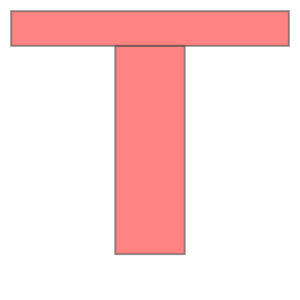

In [3]:
print(geomC._repr_svg_())
geomC

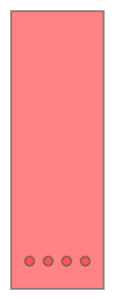

In [4]:
rec = Polygon(((-50,0),(50,0),(50,300),(-50,300)))
#rec = Polygon(((-50,0),(50,0),(50,300),(-50,300)),[[(-30,50),(-30,280),(30,280),(30,50)]]) # WITH HOLE
# rec = Polygon(((-50,0),(50,0),(50,300),(-50,300)),[[(-30,255),(-30,265),(30,265),(30,255)]]) # WITH SMALL HOLE
geom = geo.SurfaceGeometry(rec, mat1)
geomRC = geo.add_reinforcement(geom,(-30,30),9.9387229,matR)
geomRC = geo.add_reinforcement(geomRC,(-10,30),9.9387229,matR)
geomRC = geo.add_reinforcement(geomRC,(10,30),9.9387229,matR)
geomRC = geo.add_reinforcement(geomRC,(30,30),9.9387229,matR)
geomRC

In [5]:
geomRC.geometries[0].polygon.exterior.coords[:-1]

[(-50.0, 0.0), (50.0, 0.0), (50.0, 300.0), (-50.0, 300.0)]

In [6]:
geomRC.point_geometries[0]._point.coords[0]

(-30.0, 30.0)

Example translation

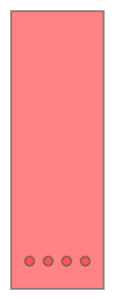

In [7]:
geomT = geomRC.translate(0,-150)
geomT

In [8]:
geomT.geometries[0].polygon.exterior.coords[:-1]

[(-50.0, -150.0), (50.0, -150.0), (50.0, 150.0), (-50.0, 150.0)]

In [9]:
geomT.point_geometries[0]._point.coords[0]

(-30.0, -120.0)

Example rotation

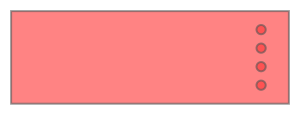

In [10]:
import numpy as np
geomR = geomT.rotate(np.pi/2)
geomR

In [11]:
geomR.geometries[0].polygon.exterior.coords[:-1]

[(150.0, -50.0), (150.0, 50.0), (-150.0, 50.0), (-150.0, -50.0)]

In [12]:
geomR.point_geometries[0]._point.coords[0]

(120.0, -30.0)

Example integration

In [13]:
from structuralcodes.sections._generic import GenericSection

sec = GenericSection(geomT, 'mySection')
sec.gross_properties

GrossProperties(area=30000.0, area_concrete=0, area_reinforcement=0, ea=0, mass=0, perimeter=0, sx=0, sy=0, cx=0, cy=0, i_yy=0, i_zz=0, i_yz=0, ei_xx=0, ei_yy=0)

In [14]:
from structuralcodes.sections._section_integrators import MarinIntegrator

integr = MarinIntegrator()
N, Mx, My = integr.integrate_strain_response_on_geometry(geo=sec.geometry,strain=[0.007, 7e-5,0])
print(N)
print(Mx)
print(My)


-0.00015637933393009007
-30260204.062867224
0.0


In [15]:
sec.section_analyzer.calculate_bending_strength(0,0)

-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
strain: [0.02066666666666667, 0.00016111111111111114, 0]
n_int= 68669.95058253821
Too much tension
Found equilibrium (after 26 iterations)
check:  0 0.006777332251658663


(UltimateBendingMomentResult(theta=0, n=0, m_x=-30260203.311229464, m_y=9.861682818004012e-09, chi_x=7.000000399708106e-05, chi_y=0, eps_a=0.00700000059956216),
 [8.055555560555557e-05,
  4.027777785277779e-05,
  6.041666672916668e-05,
  7.048611116736113e-05,
  6.54513889482639e-05,
  6.796875005781251e-05,
  6.922743061258681e-05,
  6.985677088997397e-05,
  7.017144102866755e-05,
  7.001410595932077e-05,
  6.993543842464736e-05,
  6.997477219198407e-05,
  6.999443907565242e-05,
  7.00042725174866e-05,
  6.999935579656951e-05,
  7.000181415702805e-05,
  7.000058497679878e-05,
  6.999997038668415e-05,
  7.000027768174147e-05,
  7.000012403421281e-05,
  7.000004721044849e-05,
  7.000000879856632e-05,
  6.999998959262524e-05,
  6.999999919559579e-05,
  7.000000399708106e-05],
 [15911.329958374554,
  -89605.91109346764,
  -19261.083754680905,
  837.4383635011327,
  -8438.802615302397,
  -3628.899885804218,
  -1355.1276862169325,
  -248.96823772405332,
  296.670952125598,
  24.464434939873

In [16]:
sec.section_analyzer.calculate_bending_strength(0,-10000)

-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
strain: [0.02066666666666667, 0.00016111111111111114, 0]
n_int= 68669.95058253821
Too much tension
Found equilibrium (after 26 iterations)
check:  -10000 -10000.009499610896


(UltimateBendingMomentResult(theta=0, n=-10000, m_x=-31327110.62946214, m_y=-2.3344094253169953e-09, chi_x=6.467390844582313e-05, chi_y=0, eps_a=0.006201086266873471),
 [8.055555560555557e-05,
  4.027777785277779e-05,
  6.041666672916668e-05,
  7.048611116736113e-05,
  6.54513889482639e-05,
  6.293402783871529e-05,
  6.419270839348959e-05,
  6.482204867087675e-05,
  6.450737853218316e-05,
  6.466471360152995e-05,
  6.474338113620335e-05,
  6.470404736886665e-05,
  6.46843804851983e-05,
  6.467454704336412e-05,
  6.466963032244704e-05,
  6.467208868290558e-05,
  6.467331786313486e-05,
  6.46739324532495e-05,
  6.467362515819218e-05,
  6.467377880572084e-05,
  6.467385562948516e-05,
  6.467389404136733e-05,
  6.46739132473084e-05,
  6.467390364433786e-05,
  6.467390844582313e-05],
 [25911.329958374554,
  -79605.91109346764,
  -9261.083754680905,
  10837.438363501133,
  1561.1973846976034,
  -3633.4975625475054,
  -985.2217071697523,
  300.34909647348104,
  -339.3007668068749,
  -18.69767

In [17]:
sec.section_analyzer.calculate_bending_strength(0,-50000)

-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
strain: [0.02066666666666667, 0.00016111111111111114, 0]
n_int= 68669.95058253821
Too much tension
Found equilibrium (after 27 iterations)
check:  -50000 -50000.00340889019


(UltimateBendingMomentResult(theta=0, n=-50000, m_x=-35252171.7349264, m_y=0.0, chi_x=4.9583332392589896e-05, chi_y=0, eps_a=0.0039374998588884835),
 [8.055555560555557e-05,
  4.027777785277779e-05,
  6.041666672916668e-05,
  5.0347222290972234e-05,
  4.531250007187501e-05,
  4.782986118142362e-05,
  4.908854173619793e-05,
  4.971788201358508e-05,
  4.940321187489151e-05,
  4.956054694423829e-05,
  4.9639214478911685e-05,
  4.959988071157499e-05,
  4.9580213827906644e-05,
  4.959004726974082e-05,
  4.958513054882373e-05,
  4.958267218836519e-05,
  4.958390136859446e-05,
  4.9583286778479825e-05,
  4.958359407353714e-05,
  4.958344042600848e-05,
  4.9583363602244155e-05,
  4.9583325190361987e-05,
  4.958334439630307e-05,
  4.958333479333253e-05,
  4.958332999184726e-05,
  4.9583332392589896e-05],
 [65911.32995837455,
  -39605.91109346764,
  30738.916245319095,
  2600.985295832419,
  -16157.635326808784,
  -6284.677105397539,
  -1727.9271562811336,
  463.92724979741615,
  -625.0195252107

-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
strain: [0.02066666666666667, 0.00016111111111111114, 0]
n_int= 68669.95058253821
Too much tension
Found equilibrium (after 28 iterations)
check:  -89000 -89000.00075372649


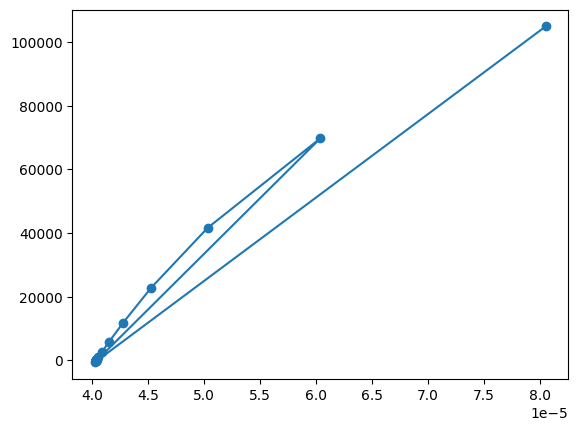

In [18]:
(res, chi, dn) = sec.section_analyzer.calculate_bending_strength(0,-89000)

import matplotlib.pyplot as plt
plt.plot(chi,dn,'-o')

In [20]:
sec.section_analyzer.calculate_bending_strength(0,-100000)

-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-150.0 100 -120.0 -0.04 3.3346666666666667
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
-120.0 0.04 150.0 -0.0035 0.00016111111111111114
strain: [0.02066666666666667, 0.00016111111111111114, 0]
n_int= 68669.95058253821
Too much tension
Found equilibrium (after 28 iterations)
check:  -100000 -100000.00579079508


True


(-5.0, 105.0, -15.0, 315.0)

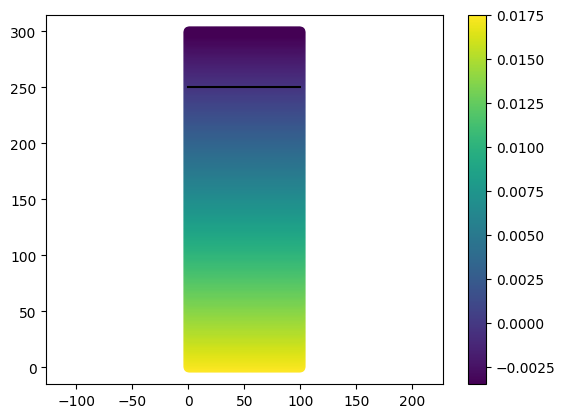

In [1]:
import numpy as np
import matplotlib.pyplot as plt
epsA = 0.007
epsA00 = 0.0175
kx = 7.0e-5
ky = 0

x = np.linspace(0,100,101)
y = np.linspace(0,300,301)
dx = (x[-1]-x[0])/(len(x)-1)
dy = (y[-1]-y[0])/(len(y)-1)

X,Y = np.meshgrid(x,y)


# strain = np.zeros_like(X)
xg = 50
yg = 150
# strain = epsA + (X-xg) * ky - (Y-yg) * kx # opt 1: epsA is in baricenter
strain = epsA00 + X * ky - Y * kx # opt 2 epsA is in 0,0 (more generic?)
# for i in range(len(x)):
#     for j in range(len(y)):
#         strain[j,i] = epsA + (X[j,i]-xg) * ky + (Y[j,i]-yg) * kx

# a + b*(x-xg) + c*(y-yg) = 0 y = (-a - b*(x-xg))/c + yg

def zero_strain(a,b,c,x):
    return -(-a - b*x)/c

y0 = zero_strain(epsA, ky, kx, (x-xg)) + yg # opt 1
y0 = zero_strain(epsA00, ky, kx, x) # opt 2
print(np.allclose(zero_strain(epsA, ky, kx, (x-xg)) + yg, zero_strain(epsA00, ky, kx, x)))
plt.scatter(X,Y,c = strain)
plt.plot(x,y0,'-k')
plt.colorbar()
plt.axis('equal')